<a href="https://colab.research.google.com/github/aditijorapur/RedditNetworkAnalysis/blob/main/176_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import matplotlib.cm as cm
import networkx.algorithms.community as nx_comm

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('redditData.csv')

# Select  the desired columns
df = df[['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'LINK_SENTIMENT']]

# Create the graph from the DataFrame
G = nx.from_pandas_edgelist(df, source='SOURCE_SUBREDDIT', target='TARGET_SUBREDDIT', edge_attr='LINK_SENTIMENT')

# Print the edges with their weights
#for u, v, w in G.edges(data='LINK_SENTIMENT'):
    #print(u, v, w)

# Print the number of nodes and edges in the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Number of connected components: ", nx.number_connected_components(G))
#print("Eccentricity:", nx.eccentricity(G))
# print("Diameter (longest shortest path):", nx.diameter(G))

# Set the figure size
plt.figure(figsize=(200,200))

# Draw the graph with node size 500 and font size 10
nx.draw(G, with_labels=True, node_size=500, font_size=10)

# Show the plot
plt.show()





Number of nodes: 1003
Number of edges: 1339
Diameter (longest shortest path): 13


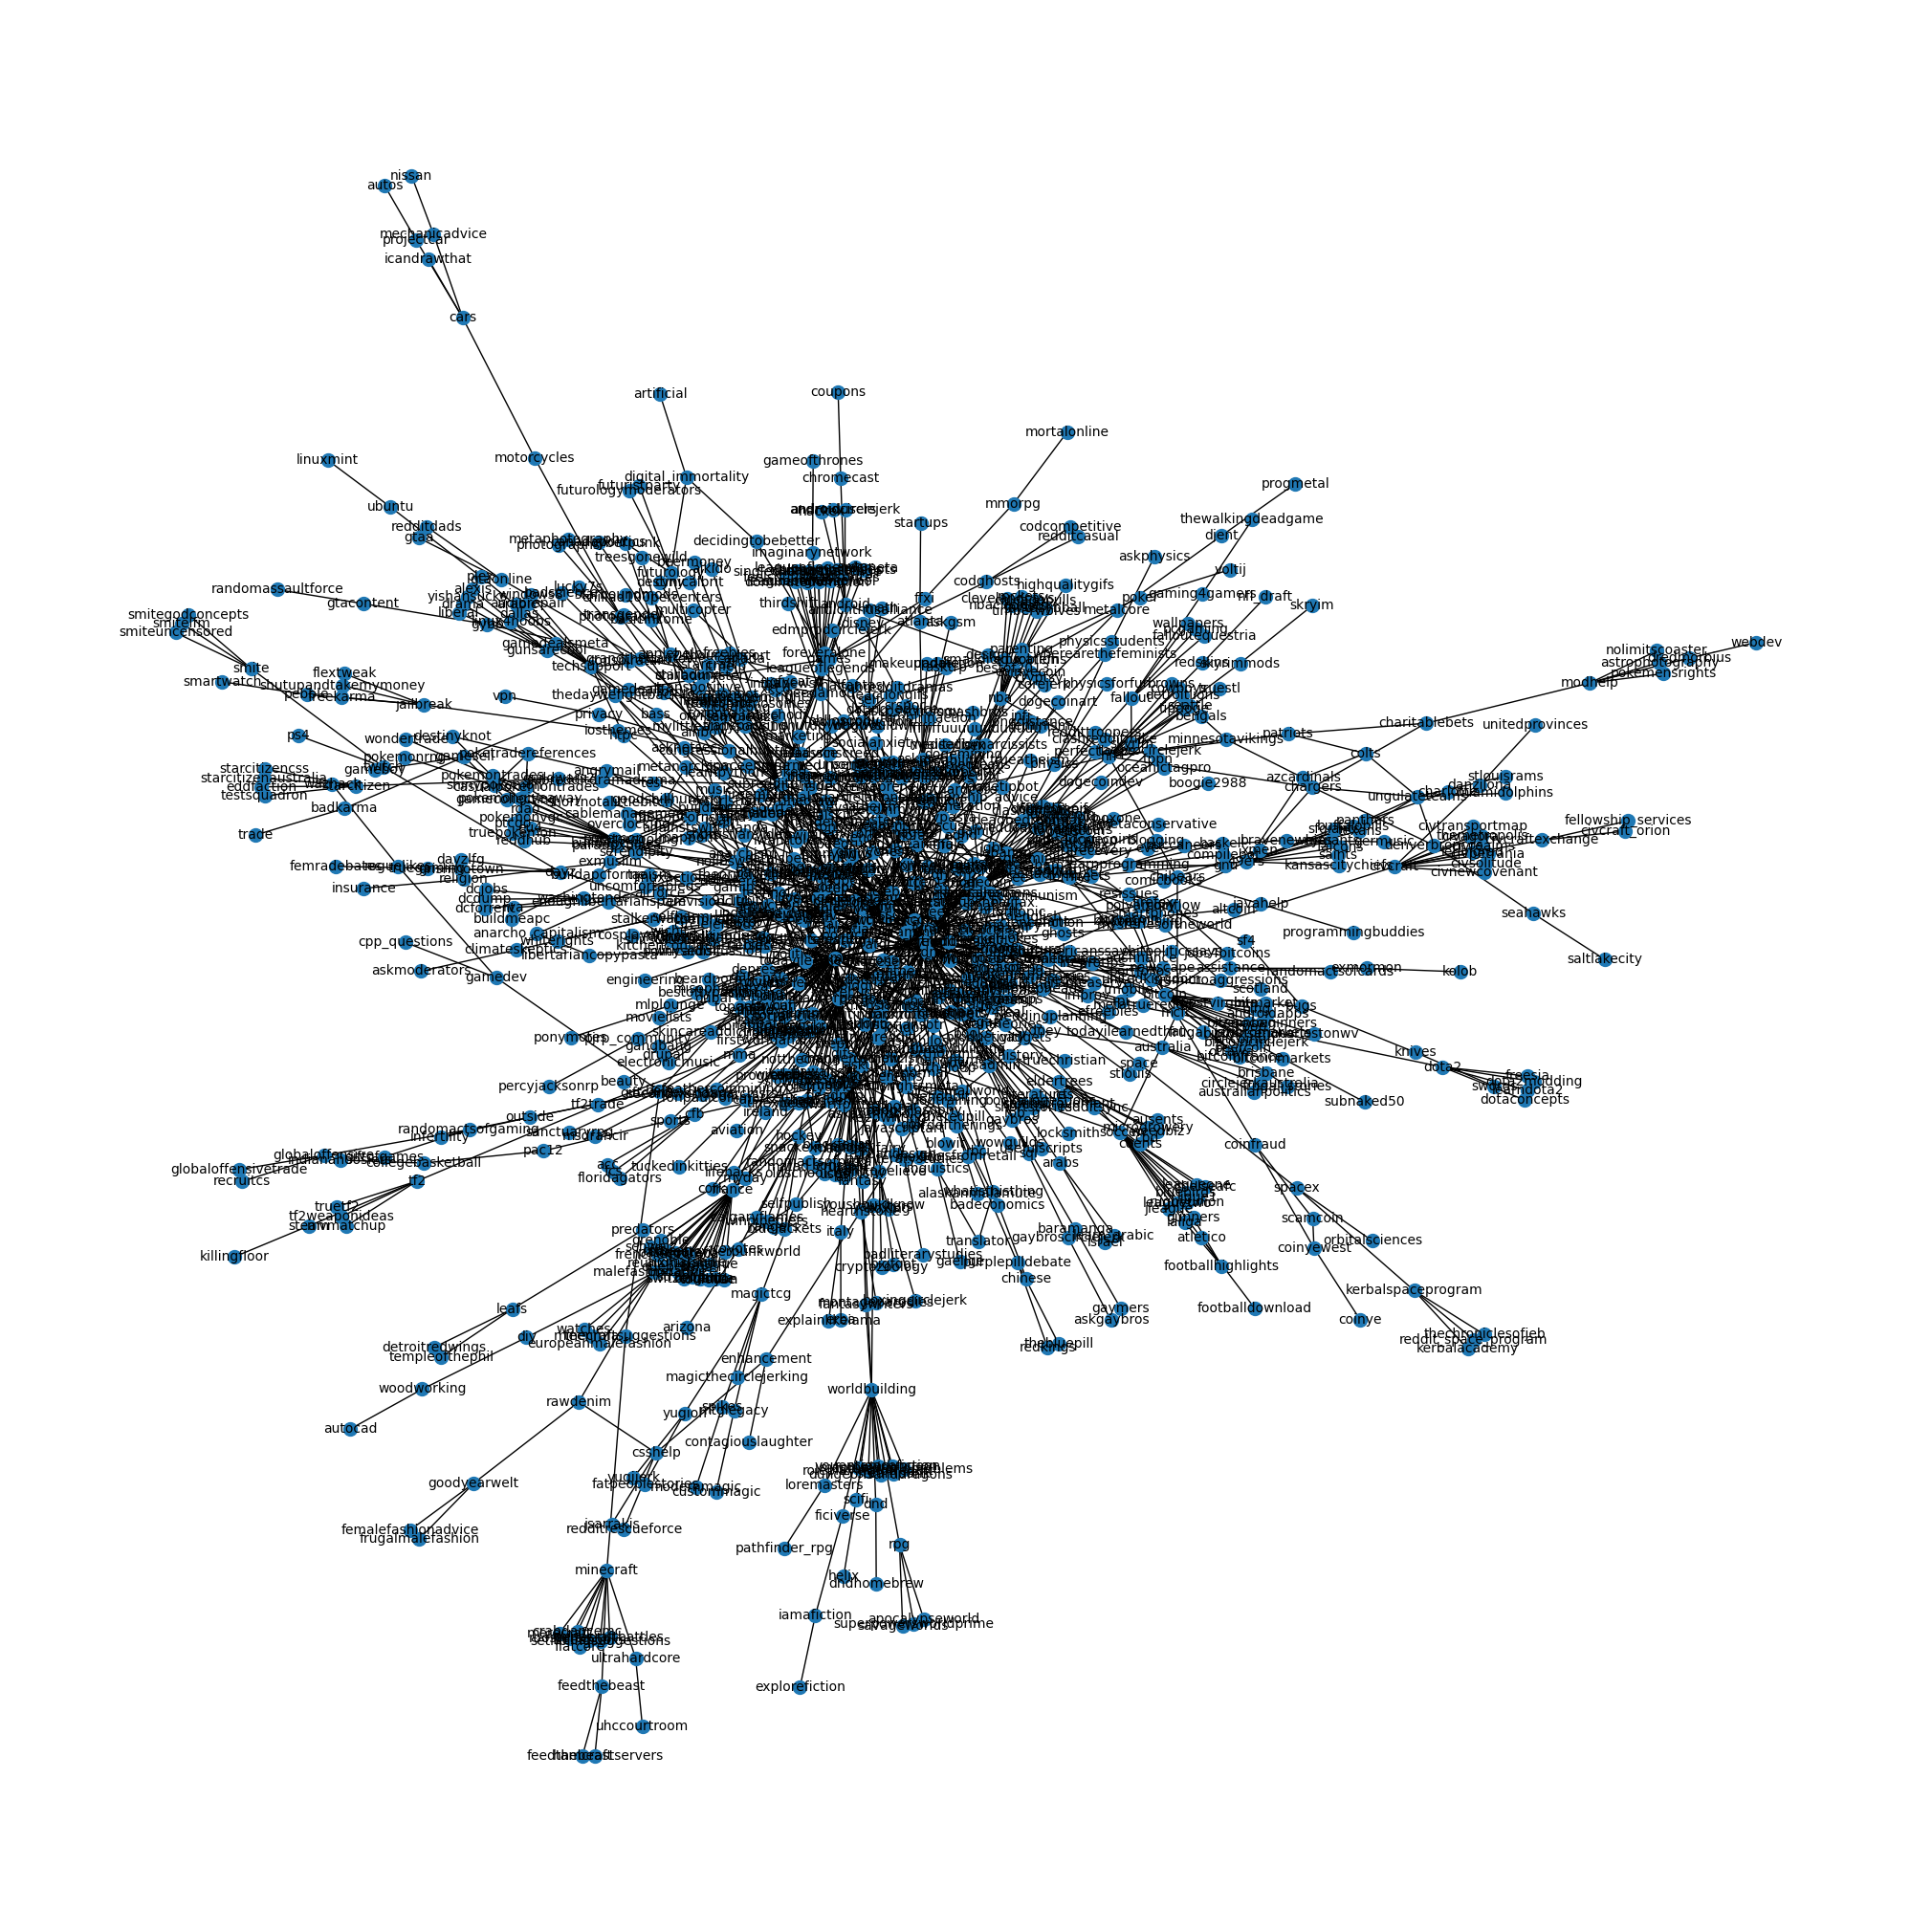

In [ ]:
#We cannot find the diameter of the graph because it is not connected so we found the diameter of the largest connected component instead
# Find the largest connected component
gcc = max(nx.connected_components(G), key=len)
G = G.subgraph(gcc)

# Print the number of nodes and edges
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Find the diameter of the largest connected component
diameter = nx.diameter(G)
print("Diameter (longest shortest path):", diameter)

#Set the figure size
plt.figure(figsize=(20, 20))

#Draw the graph
nx.draw(G, with_labels=True, font_size=10, node_size=100)

#Show the plot
plt.show()

In [ ]:
#The five nodes with the highest clustering coefficients.

# Calculate clustering coefficient of each node
clustering = nx.clustering(G)

# Sort nodes by clustering coefficient and print the top 5
top5 = sorted(clustering.items(), key=lambda x: x[1], reverse=True)[:5]
for node, cc in top5:
    print(node, cc)

education 1.0
pokemongiveaway 1.0
conspiratocracy 1.0
buildapcsales 1.0
karmacourtattorneys 1.0


In [ ]:
#The five nodes with the highest degree.

# Calculate degree centrality of each node
degree_centralities = nx.degree_centrality(G)

# Get the top 5 nodes with the highest degree centrality
top_nodes = sorted(degree_centralities, key=degree_centralities.get, reverse=True)[:5]

# Print the top 5 nodes with their degree centrality scores
for node in top_nodes:
    print(f"{node}: {degree_centralities[node]}")

askreddit: 0.0653819683413627
iama: 0.04679972470750172
dailydot: 0.025464556090846524
subredditdrama: 0.024776324845147968
pics: 0.02202339986235375


In [ ]:
# Calculate betweenness centrality of each node
betweenness = nx.betweenness_centrality(G)

# Sort nodes by betweenness centrality and print the top 5
top5 = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
for node, bc in top5:
    print(node, bc)

askreddit 0.3821071304476218
iama 0.26955903209063353
subredditdrama 0.12945525499014546
dailydot 0.11342460425497487
todayilearned 0.10864249952731021


In [ ]:
#Caluclate the top 5 closeness centrality

#Calculate the closeness centrality for each node
closeness_centrality = nx.closeness_centrality(G)

#Sort the nodes by their closeness centrality in descending order
top_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5]

#Print the top 5 nodes with the highest closeness centrality
for node in top_nodes:
    print(node, closeness_centrality[node])

askreddit 0.24339095583174775
iama 0.23109930555395714
todayilearned 0.21880523230092838
dailydot 0.21866674797668728
subredditdrama 0.21661032087972784


In [ ]:
# Find the Girvan-Newman communities


# # Print the edges that would be removed to split the graph into the desired number of components
# print("Edges removed by Girvan-Newman algorithm to split graph into", num_communities, "components:")
# for edge in removed_edges:
#     print(edge)
# Find the Girvan-Newman communities
comp = nx.algorithms.community.centrality.girvan_newman(G)
num_communities = 3  # Set the desired number of communities
for i in range(num_communities - 1):
    removed_edges = next(comp)



In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100, 80))
#nx.draw(G, with_labels=True, font_weight='bold')
#plt.show()

<Figure size 10000x8000 with 0 Axes>

<Figure size 10000x8000 with 0 Axes>

182


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


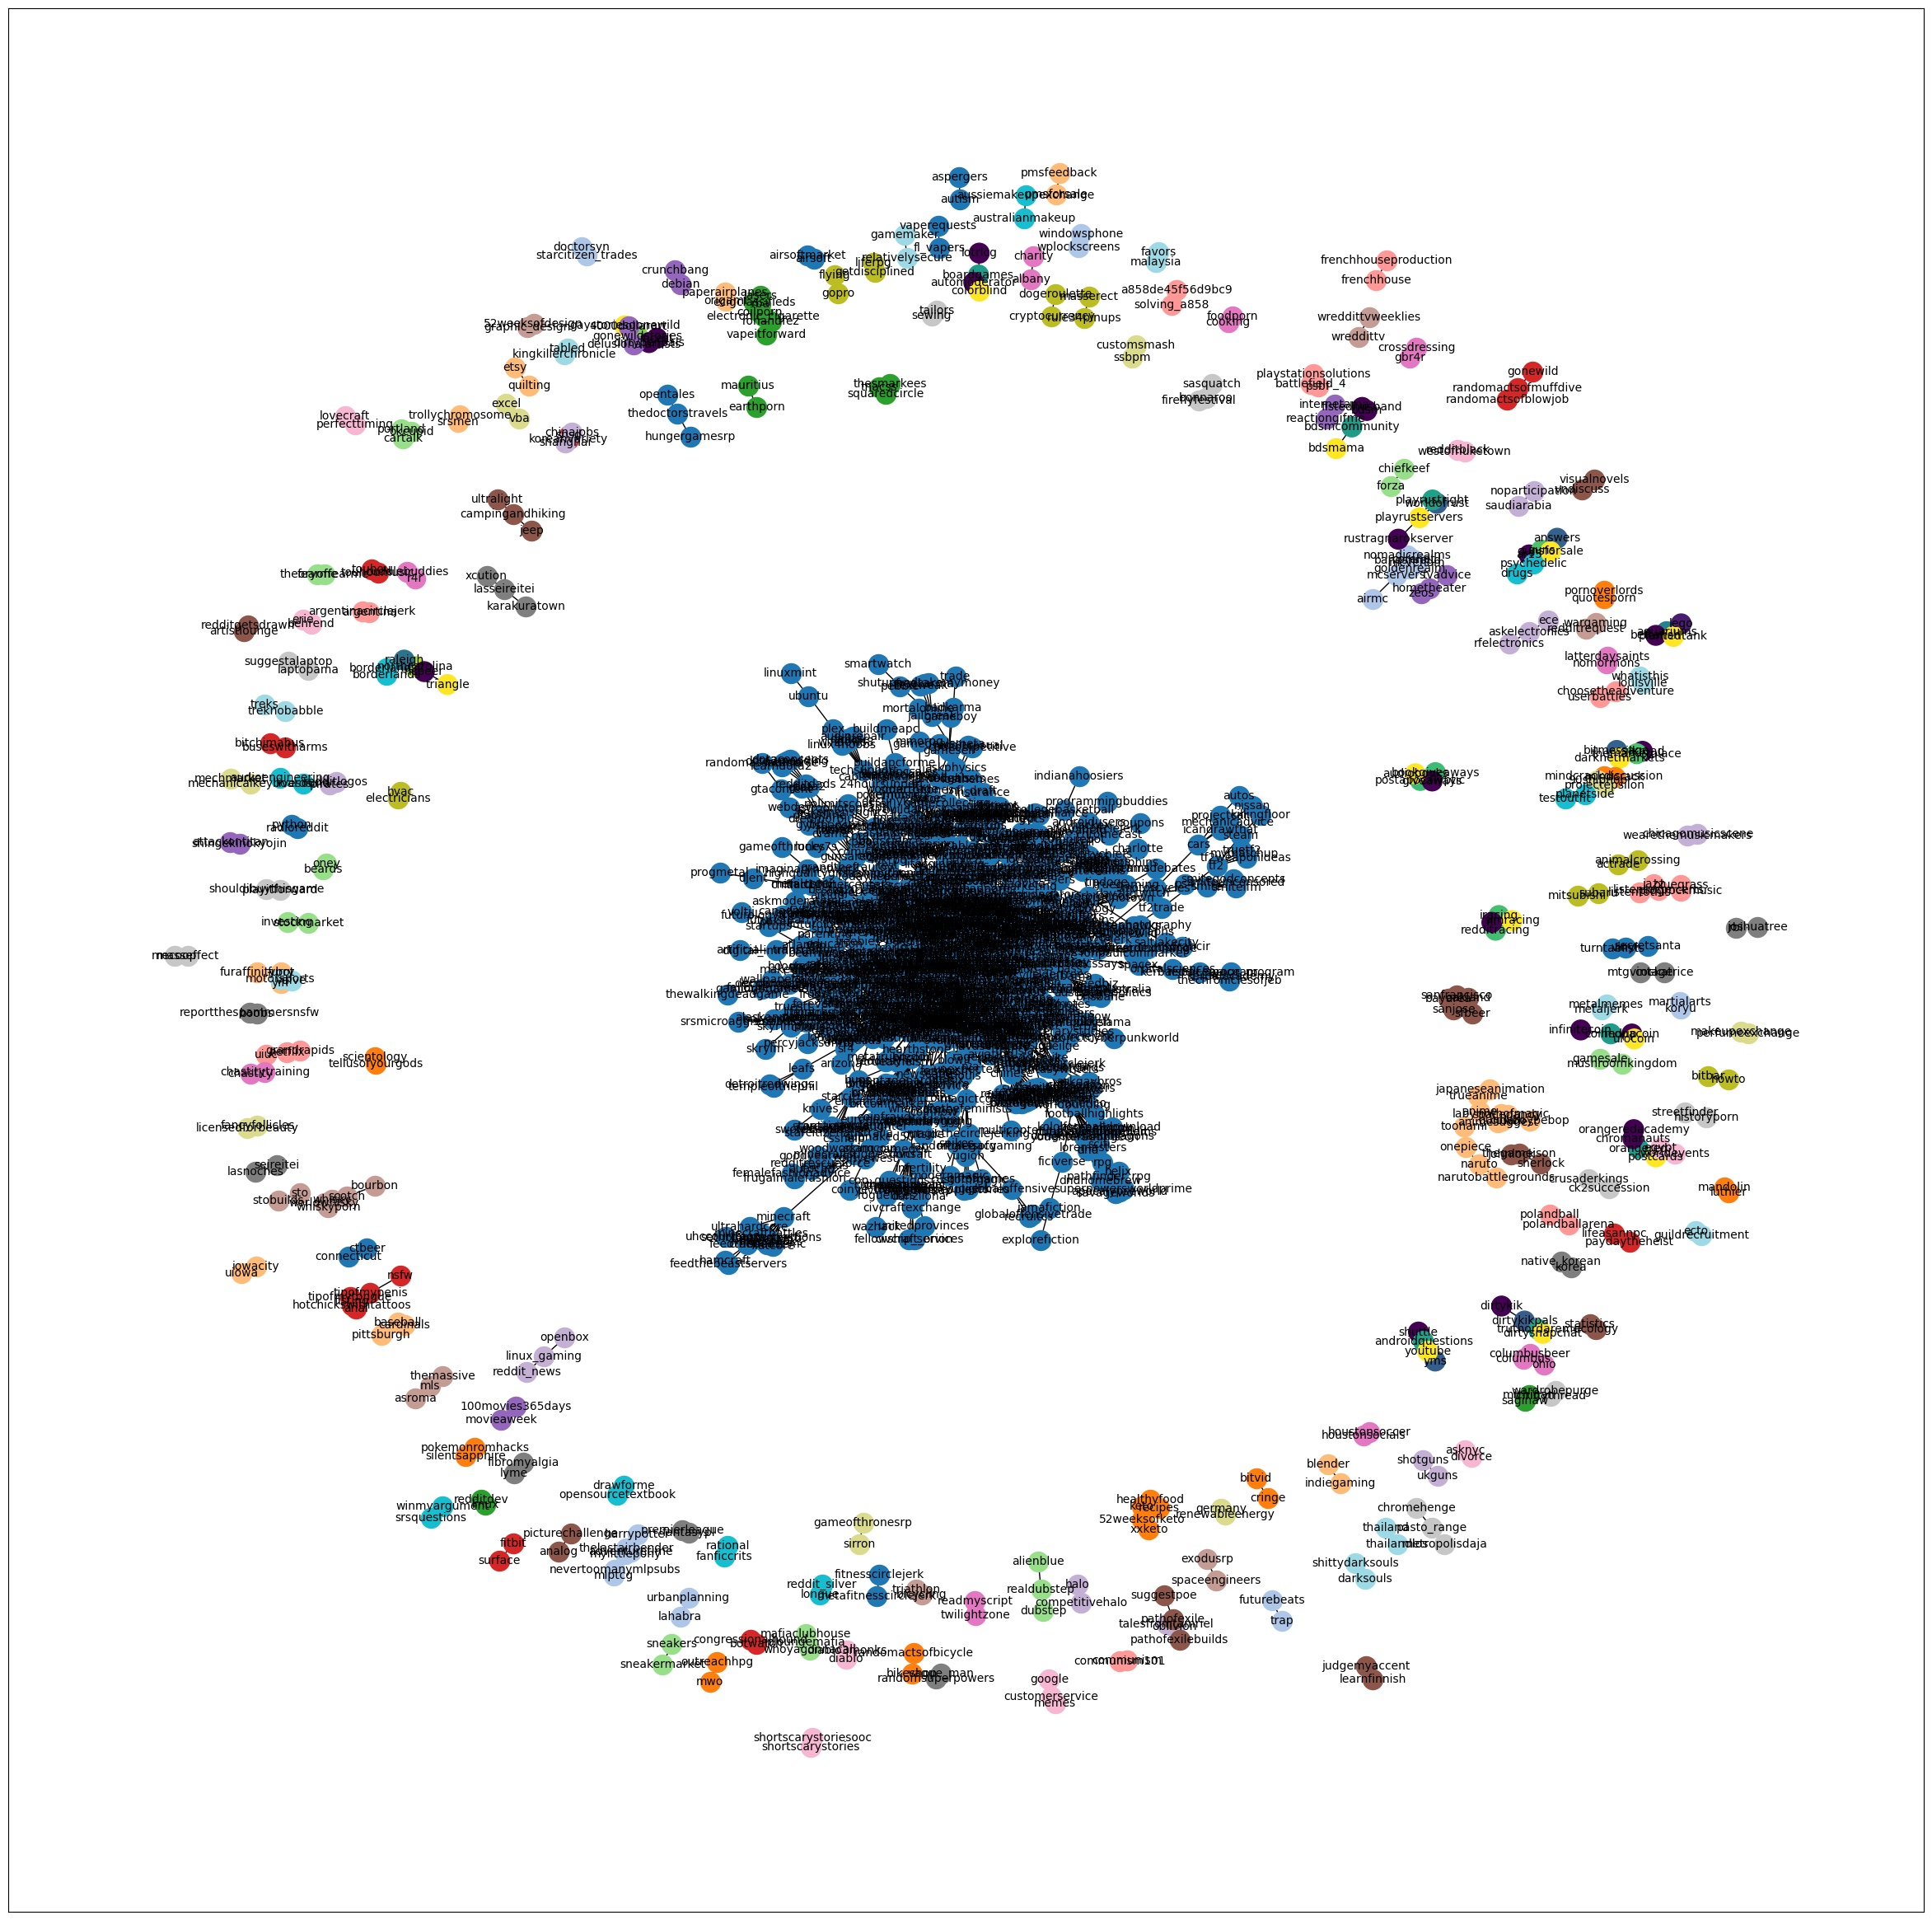

Nodes in largest community: 975


In [ ]:
#Finding Girvan-Newman communities
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community.centrality import girvan_newman

df = pd.read_csv('redditData.csv')
G = nx.from_pandas_edgelist(df, 'SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'LINK_SENTIMENT')

comp = girvan_newman(G)
communities = next(comp)
print(len(communities))



pos = nx.spring_layout(G)
#Generate a list of distinct colors
num_communities = 182
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, num_communities)]

# Set figure size
plt.figure(figsize=(30, 30))



#Loop to print out the communities with different colors
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i])
nx.draw_networkx_edges(G, pos)

# Add node labels
node_labels = {node:node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)

plt.show()

communities_generator = nx.algorithms.community.girvan_newman(G)
communities = next(communities_generator)

# Sort communities by size in descending order
sorted_communities = sorted(communities, key=lambda x: len(x), reverse=True)

# Select the largest community
largest_community = sorted_communities[0]

num_nodes = len(largest_community)

# Print the nodes in the largest community
print("Nodes in largest community:", num_nodes)


In [ ]:
# Fruchterman Reingold Visualization
#https://networkx.org/documentation/networkx-1.11/reference/generated/networkx.drawing.layout.fruchterman_reingold_layout.html
plt.figure(figsize=(80,80))
nx.draw(G, with_labels=True, node_size=2000, font_size = 20, node_color="pink", pos=nx.fruchterman_reingold_layout(G))
plt.title("fruchterman_reingold_visualization", fontsize = 20)
plt.show()


# # Circular Visualtion
# #https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.circular_layout.html
plt.figure(figsize=(50,50))
nx.draw(G, with_labels=True, node_size=2000, node_color="pink", pos=nx.circular_layout(G))
plt.title("circular_visualization", fontsize = 20)
plt.show()

#  Random Visualization
# #https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.random_layout.html
plt.figure(figsize=(50,50))
nx.draw(G, with_labels=True, node_size=2000, node_color="pink", pos=nx.random_layout(G))
plt.title("random_visualization")
plt.show()

# # # Spectral Vitualization
# # #https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spectral_layout.html
plt.figure(figsize=(50,50))
nx.draw(G, with_labels=True, node_size=2000, node_color="pink", pos=nx.spectral_layout(G))
plt.title("spectral_visualization")
plt.show()

# # Spring Visualization
# #https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html
plt.figure(figsize=(50,50))
nx.draw(G, with_labels=True, node_size=2000, node_color="pink", pos=nx.spring_layout(G))
plt.title("spring_visualization")
plt.show()
